In [2]:
%matplotlib inline

In [3]:
# import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [4]:
# files to be read
# NOTE TO SELF, resources before the file name.

ride_data_file = os.path.join('Resources' , 'ride_data.csv')
city_data_file = os.path.join('Resources' , 'city_data.csv')

In [5]:
# create dataframes
ride_data_df = pd.read_csv(ride_data_file)
city_data_df = pd.read_csv(city_data_file)

In [6]:
# checking if there are missing values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [7]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
city_data_df['driver_count'].dtype

dtype('int64')

In [9]:
cities = city_data_df['city'].tolist()
cities = set(cities)
print(len(cities))

120


In [10]:
# merge the dataframes
# the how parameter here is new to me
# the output of a merge with and without are somewhat visually different
city_ride_df = pd.merge(ride_data_df , city_data_df ,how="left", on=["city" ,"city"])

In [11]:
city_ride_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [12]:
city_types =set( city_ride_df['type'].tolist())
city_types


{'Rural', 'Suburban', 'Urban'}

In [13]:
# dataframes for the types of cities
rural_df = city_ride_df[city_ride_df['type'] == 'Rural']

suburban_df = city_ride_df[city_ride_df['type'] == 'Suburban']

urban_df = city_ride_df[city_ride_df['type'] == 'Urban']

In [14]:
# total ride counts per city types
rural_total_ride = rural_df['ride_id'].count()
suburban_total_ride = suburban_df['ride_id'].count()
urban_total_ride = urban_df['ride_id'].count()


In [15]:
# get the no. of rides in the cities per city type
rural_cityride_ct = rural_df.groupby(['city']).count()['ride_id']
suburban_cityride_ct = suburban_df.groupby(['city']).count()['ride_id']
urban_cityride_ct = urban_df.groupby(['city']).count()['ride_id']


In [16]:
# get the average fare per city in the three city types
avg_rural_fare = rural_df.groupby(['city']).mean()['fare']
avg_suburban_fare = suburban_df.groupby(['city']).mean()['fare']
avg_urban_fare = urban_df.groupby(['city']).mean()['fare']


In [17]:
# get the average no. of drivers per city in the three city types
avg_rdriver_count = rural_df.groupby(['city']).mean()['driver_count']
avg_sdriver_count = suburban_df.groupby(['city']).mean()['driver_count']
avg_udriver_count = urban_df.groupby(['city']).mean()['driver_count']

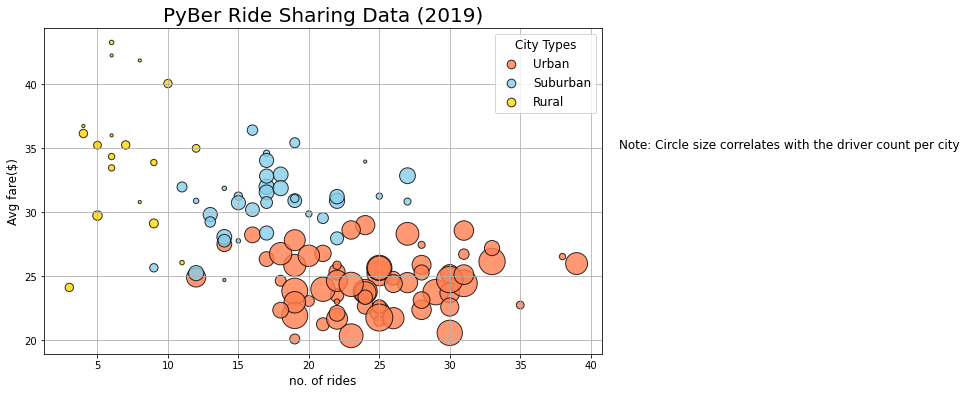

In [18]:
# plot the graphs no.of rides on x,  avg fare on y
fig , ax = plt.subplots(figsize=(10,6))
ax.scatter(urban_cityride_ct, 
           avg_urban_fare,
           label='Urban',
           s=10*avg_udriver_count,
          c = 'coral',
           edgecolor='black',
           linewidth=1,
           alpha=0.8
          )

ax.scatter(suburban_cityride_ct, avg_suburban_fare,
           label='Suburban',
           s=10*avg_sdriver_count,
          c = 'skyblue', edgecolor='black',
           linewidth=1, alpha=0.8
          )

ax.scatter(rural_cityride_ct, avg_rural_fare,
           label='Rural',
           s=10*avg_rdriver_count,
          c = 'gold', edgecolor='black',
           linewidth=1, alpha=0.8
          )

ax.set_xlabel('no. of rides', fontsize=12)
ax.set_ylabel('Avg fare($)', fontsize=12)
ax.set_title('PyBer Ride Sharing Data (2019)',  fontsize=20)
# create a legend to have the markers all the same size in the label

lgnd = ax.legend(fontsize="12", mode="Expanded",
                scatterpoints=1, loc="best" , title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)



# add a text to the side of the chart .text(x,y, "message")
ax.text(42,35, "Note: Circle size correlates with the driver count per city" , fontsize="12")

# save the figure
plt.savefig("analysis/Fig2.png")

ax.grid(True)
plt.show()

In [19]:
# get the summary statistics of the dataframes
urban_cityride_ct.describe()
rural_cityride_ct.describe()
suburban_cityride_ct.describe()
# last line of code is what is displayed

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [20]:
# get the mean of the ride counts per city type
mean_urban_count = np.mean(urban_cityride_ct)
print(f'the mean for the ride counts for urban trips is {mean_urban_count:.2f}')
median_urban_count = np.median(urban_cityride_ct)
print(f'the median for the ride counts for urban trips is {median_urban_count:.2f}')
mode_urban_count  = sts.mode(urban_cityride_ct)
print(f'the mode for the ride counts for urban trips is {mode_urban_count}\n')



mean_suburban_count = np.mean(suburban_cityride_ct)
print(f"the mean for the ride counts for suburban trip is {mean_suburban_count:.2f}")
median_suburban_count = np.median(suburban_cityride_ct)
print(f'the median for the ride counts for suburban trips is {median_suburban_count:.2f}')
mode_suburban_count  = sts.mode(suburban_cityride_ct)
print(f'the mode for the ride counts for suburban trips is {mode_suburban_count}\n')


mean_rural_count = np.mean(rural_cityride_ct)
print(f"the mean for the ride counts for suburban trip is {mean_rural_count:.2f}")
median_rural_count = np.median(rural_cityride_ct)
print(f'the median for the ride counts for rural trips is {median_rural_count:.2f}')
mode_rural_count  = sts.mode(rural_cityride_ct)
print(f'the mode for the ride counts for rural trips is {mode_rural_count}')

the mean for the ride counts for urban trips is 24.62
the median for the ride counts for urban trips is 24.00
the mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7]))

the mean for the ride counts for suburban trip is 17.36
the median for the ride counts for suburban trips is 17.00
the mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7]))

the mean for the ride counts for suburban trip is 6.94
the median for the ride counts for rural trips is 6.00
the mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [21]:
urban_fares = urban_df['fare']
suburban_fares = suburban_df['fare']
rural_fares  = rural_df['fare']

mean_urban_fare = np.mean(urban_fares)
print(f"the mean fare price for urban trips is ${mean_urban_fare:.2f}")
median_urban_fare = np.median(urban_fares)
print(f"the median fare price for urban trips is ${median_urban_fare:.2f}")
mode_urban_fare = sts.mode(urban_fares)
print(f"the mode fare price for urban trips is {mode_urban_fare}.\n")

mean_suburban_fare = np.mean(suburban_fares)
print(f"the mean fare price for suburban trips is ${mean_suburban_fare:.2f}")
median_suburban_fare = np.median(suburban_fares)
print(f"the median fare price for suburban trips is ${median_suburban_fare:.2f}")
mode_suburban_fare = sts.mode(suburban_fares)
print(f"the mode fare price for suburban trips is {mode_suburban_fare}.\n")

mean_rural_fare = np.mean(rural_fares)
print(f"the mean fare price for rural trips is ${mean_rural_fare:.2f}")
median_rural_fare = np.median(rural_fares)
print(f"the median fare price for rural trips is ${median_rural_fare:.2f}")
mode_rural_fare = sts.mode(rural_fares)
print(f"the mode fare price for rural trips is {mode_rural_fare}.")

the mean fare price for urban trips is $24.53
the median fare price for urban trips is $24.64
the mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).

the mean fare price for suburban trips is $30.97
the median fare price for suburban trips is $30.75
the mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).

the mean fare price for rural trips is $34.62
the median fare price for rural trips is $37.05
the mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [22]:
rural_fares.describe()

count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [23]:
urban_drivers = urban_df['driver_count']
suburban_drivers = suburban_df['driver_count']
rural_drivers = rural_df['driver_count']

mean_urban_drivers = np.mean(urban_drivers)
print(f"the mean fare price for urban trips is {mean_urban_drivers:.0f}")
median_urban_drivers = np.median(urban_drivers)
print(f"the median fare price for urban trips is {median_urban_drivers}")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"the mode fare price for urban trips is {mode_urban_drivers}.\n")

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"the mean fare price for suburban trips is {mean_suburban_drivers:.0f}")
median_suburban_drivers = np.median(suburban_drivers)
print(f"the median fare price for suburban trips is {median_suburban_drivers}")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"the mode fare price for suburban trips is {mode_suburban_drivers}.\n")

mean_rural_drivers = np.mean(rural_drivers)
print(f"the mean fare price for rural trips is {mean_rural_drivers:.0f}")
median_rural_drivers = np.median(rural_drivers)
print(f"the median fare price for rural trips is {median_rural_drivers}")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"the mode fare price for rural trips is {mode_rural_drivers}.\n")

the mean fare price for urban trips is 37
the median fare price for urban trips is 37.0
the mode fare price for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).

the mean fare price for suburban trips is 14
the median fare price for suburban trips is 16.0
the mode fare price for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).

the mean fare price for rural trips is 4
the median fare price for rural trips is 4.0
the mode fare price for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).



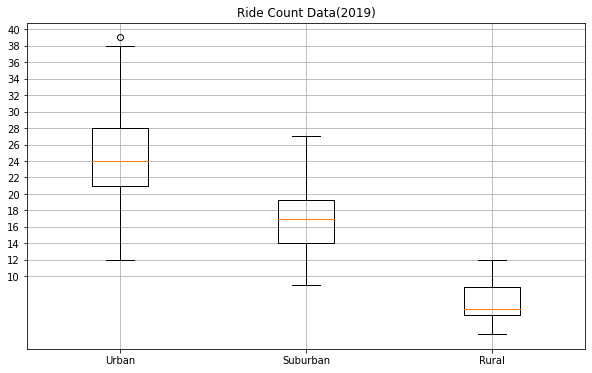

<Figure size 432x288 with 0 Axes>

In [24]:
# box and whiskers chart for the ride count 
x_labels = ["Urban" ,"Suburban" , "Rural"]
ride_count_data = [urban_cityride_ct , suburban_cityride_ct , rural_cityride_ct]
fig , ax = plt.subplots(figsize = (10,6))
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_title("Ride Count Data(2019)")
ax.set_ylabel = ('Number of Rides')
ax.set_yticks(np.arange(10,41, step = 2.0))
ax.grid()
plt.show()
# save the fig
plt.savefig("analysis/Fig3.png")

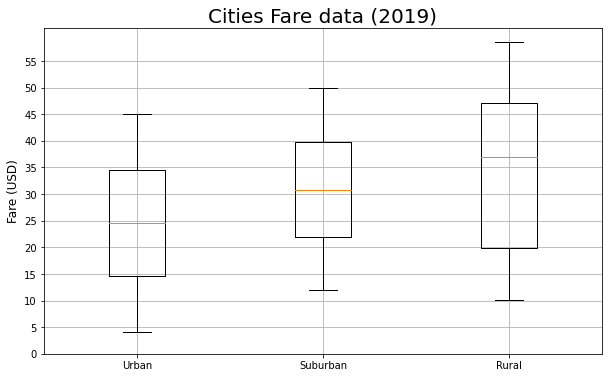

<Figure size 432x288 with 0 Axes>

In [25]:
# box and whiskers chart for fare data
x_labels = ["Urban", "Suburban" , "Rural"]
fare_data = [urban_fares , suburban_fares , rural_fares]
fig ,ax = plt.subplots(figsize = (10,6))
ax.boxplot(fare_data , labels = x_labels)
ax.set_yticks(np.arange(0,60, step = 5)) 
ax.set_ylabel("Fare (USD)", fontsize = 12)
ax.set_title("Cities Fare data (2019)", fontsize ="20")
ax.grid()
plt.show()
# save this figure
plt.savefig("analysis/Fig4.png")

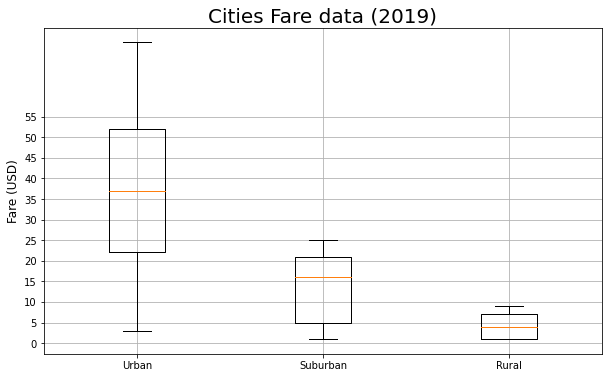

<Figure size 432x288 with 0 Axes>

In [26]:
# box and whiskers chart for driver_count data
x_labels = ["Urban", "Suburban" , "Rural"]
driver_data = [urban_drivers , suburban_drivers , rural_drivers]
fig ,ax = plt.subplots(figsize = (10,6))
ax.boxplot(driver_data , labels = x_labels)
ax.set_yticks(np.arange(0,60, step = 5)) 
ax.set_ylabel("Fare (USD)", fontsize = 12)
ax.set_title("Cities Fare data (2019)", fontsize ="20")
ax.grid()
plt.show()
# save this figure
plt.savefig("analysis/Fig5.png")

In [27]:
total_fares = city_ride_df['fare'].sum()
total_fares

63538.64

In [28]:
urban_fares = urban_df['fare'].sum()
percent_urban = urban_fares / total_fares * 100
percent_urban

62.72463496228438

In [29]:
rural_fares = rural_df["fare"].sum()
percent_rural = rural_fares / total_fares * 100
percent_rural

6.81149297498341

In [30]:
suburban_fare = suburban_df["fare"].sum()
percent_suburban = suburban_fare / total_fares * 100
percent_suburban

30.46387206273222

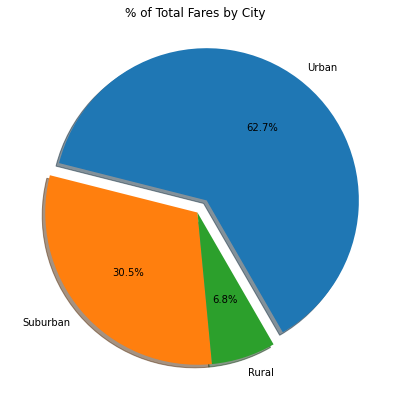

In [31]:
# create a pie chart
import matplotlib as mp1
percentages = [percent_urban, percent_suburban , percent_rural]
p_labels = ["Urban","Suburban","Rural"]
explode = [0.1,0,0]
fig , ax = plt.subplots(figsize=(7,7))
ax.pie(percentages , labels=p_labels, shadow=True, autopct="%.1f%%", startangle=-60, explode=explode)
ax.set_title("% of Total Fares by City ")
mp1.rcParams['font.size'] = 14
# save fig as fig6
plt.savefig("analysis/Fig6.png")
plt.show()

In [32]:
# get info for rides pie chart
total_rides = city_ride_df['ride_id'].count()
total_rides

2375

In [33]:
rides_per_citytype = city_ride_df.groupby(['type']).count()['ride_id']
rides_per_citytype

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [34]:
percent_type_ride = rides_per_citytype / total_rides * 100
percent_type_ride

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

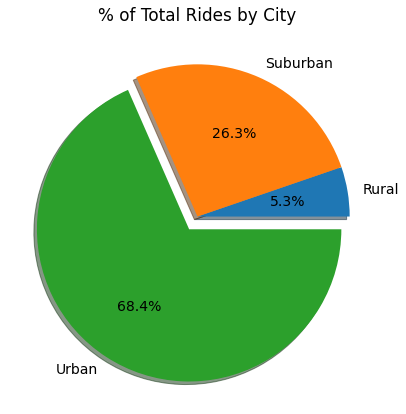

In [35]:
# create the pie chart
labels = ["Rural","Suburban","Urban"]
explode_values = [0,0,0.1]
fig,ax = plt.subplots(figsize=(7,7))
ax.pie(percent_type_ride , labels = labels , explode=explode_values,
      autopct="%.1f%%" , shadow=True )
ax.set_title("% of Total Rides by City")
mp1.rcParams["font.size"] = 14
plt.show()


In [38]:
total_driver_count = city_ride_df["driver_count"].sum()
total_driver_count

68709

In [39]:
citytype_drivers = city_ride_df.groupby(['type']).sum()['driver_count']
citytype_drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [40]:
percent_drivers = citytype_drivers / total_driver_count * 100
percent_drivers

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

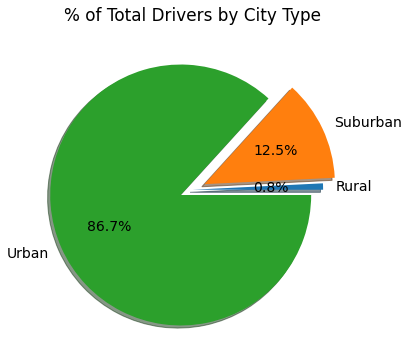

In [45]:
# create a pie chart representing the driver across city types
pie_labels = ["Rural", "Suburban", "Urban"]
explode_values = [0,0.1,0.1]
fig , ax=plt.subplots(figsize=(10,6))
ax.pie(percent_drivers , labels=pie_labels, autopct="%.1f%%",
      shadow=True , explode=explode_values )
mp1.rcParams['font.size'] = 14
ax.set_title('% of Total Drivers by City Type')
#save this image as fig 7
plt.savefig("analysis/Fig7.png")
plt.show()